<a href="https://colab.research.google.com/github/Santt89/Proyecto_datos_alojamientos/blob/main/Proyecto_final_Programacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema

A traves de la pagina Inside Airbnb la cual nos brinda informacion acerca de alquileres en las diferentes ciudades del mundo, descargaremos un archivo csv, que nos permite visualizar datos con detalles acerca de dichos alquileres.
Seleccionaremos una ciudad y luego haremos 3 preguntas, las cuales seran respondidas mediante un programa en python. 

❌🐼❌ NO USAREMOS PANDAS ❌🐼❌

# Ciudad elegida: San Diego (EEUU)

**Preguntas:**


1- Promedio de precios de una noche en los alojamientos por barrio


2- Top 5 alojamientos más baratos en un barrio (a elegir)


3- Porcentaje de alojamientos que permiten mascotas por barrio


**Los datos que utilizaremos para responder nuestras preguntas seran:**

*   Nombres de los barrios (strings)
*   Nombres de los alojamientos (strings)
*   Precios de los alojamientos (enteros)

# Estructura(s) de dato(s)

# Los datos que cargaremos en la memoria serán los siguientes:
-	Nombre del alojamiento, en el mismo nos dirá si se permiten mascotas o no (string)
-	Costo del alojamiento (entero)
-	Barrio en el que se encuentra el alojamiento (string)

**En base a esos datos podremos responder nuestras 3 preguntas.**

Las estructuras que utilizaremos para cargar los datos son: **listas y diccionarios**. (Sera una lista de diccionarios)

Una vez cargados los datos, utilizaremos esta estructura como base para generar nuevas estructuras particulares para responder cada pregunta. 

# Las estructuras que utilizaremos serán las siguientes:

•	Un **diccionario** en el que la clave será el nombre del barrio (string) y el valor una lista con los precios de los alojamientos del mismo (lista de enteros)

(Nos ayudara a responder la primera pregunta)

Ejemplo: {“Barrio Sur”: [12,23,42,32,12] , “Barrio Norte”: [72,32,42,12,12], “Barrio Central”: [11,83,42,42,14]}

•	Una **lista de tuplas**, en la que cada tupla tendra dos elementos. El primer elemento sera el nombre del alojamiento (string) y el segundo elemento sera el precio (entero)

(Nos ayudara a responder la segunda pregunta)

Ejemplo: [("Hostel K12",60), ("Pieza tresh",90) , ("Hotel D99",67)]

•	Un **diccionario** en el que la clave será el nombre del barrio (string) y el valor una lista. El primer elemento de la lista indicara en cuantos alojamientos del barrio permiten mascotas y el segundo en cuantos no. (enteros)

(Nos ayudara a responder la tercera pregunta)

Ejemplo: {“Barrio Sur”: [43,21], “Barrio Norte”: [10,3], “Barrio Central”: [30,22]}



# Carga de datos

In [1]:
import csv

def lectura_y_carga(file):
  '''
  La funcion toma un archivo csv y lo carga en una lista de diccionarios
  '''
  datos =[]
  columnas = None

  with open(file, mode="r") as archivo:
      lector = csv.reader(archivo)

      for i, fila in enumerate(lector):
          if i == 0:
              columnas = fila

          else:
              entrada = {}
              for columna, valor in zip(columnas, fila):
                 #Solo cargaremos los datos del nombre del alojamiento, del barrio y el precio
                  if columna == 'name' or columna =='neighbourhood' or columna =='price':
                      entrada[columna] = valor
              datos.append(entrada)
                        
  return datos


In [2]:
#variable global
lista = lectura_y_carga("listings.csv")

#importaciones para graficar 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def principal(lista):
  '''
  La funcion toma la lista pasada como argumento y la muestra.
  '''
  print(lista)

principal(lista)

[{'name': 'Cozy independent room next to Lake Murray', 'neighbourhood': 'San Carlos', 'price': '85'}, {'name': 'RelaxingSunset View PrivateBalcony for SIX guests', 'neighbourhood': 'Tijuana River Valley', 'price': '96'}, {'name': 'San Diego-Bonita Oasis on 1/2 acre with pool #1', 'neighbourhood': 'Bay Terrace', 'price': '73'}, {'name': 'Huge Royal Luxury En Suite (Bath, WC & Balcony)', 'neighbourhood': 'Mission Bay', 'price': '90'}, {'name': '2 bedrooms/ 1 bath - Upstairs - Near Lake Hodges', 'neighbourhood': 'Rancho Bernadino', 'price': '167'}, {'name': 'Bright freshly renovated apartment w/ kitchenette', 'neighbourhood': 'Mission Bay', 'price': '54'}, {'name': "Majo's Place", 'neighbourhood': 'Mission Bay', 'price': '31'}, {'name': 'Wonderful 1 Bedroom, Close to the Bay', 'neighbourhood': 'Northwest', 'price': '356'}, {'name': 'Slightly SE of San Diego -- Queen 2', 'neighbourhood': 'Bonita Long Canyon', 'price': '40'}, {'name': 'The West Star', 'neighbourhood': 'Northwest', 'price': 

# 1era pregunta

# **Promedio de precios de una noche en los alojamientos por barrio**

In [3]:

'''
En primer lugar, tomaremos los datos de la funcion principal y
a traves de la funcion barrios_y_precios crearemos un diccionario en el que la clave será el nombre del barrio (string) y 
el valor una lista con los precios de los alojamientos del mismo (lista de enteros).
Luego mediante la funcion promedios que recibira el diccionario de salida de barrio_y_precios, calcularemos el promedio de la lista de precios.
'''

def barrio_y_precios(lista):
    '''
    la funcion toma la lista proveniente de la funcion principal, y en base a ella
    crea un diccionario con la clave indicando el nombre de cada ciudad y
    el valor es una lista con todos los precios de los alojamientos que hay en cada una
    
    '''
    diccionario = {}
    for persona in lista:
        barrio = persona['neighbourhood']
        precio = persona['price']

        #primero verificamos que no se encuentre en el diccionario para poder agregarla
        if barrio not in diccionario:
            diccionario[barrio]=[precio]
        
        #si ya se encuentra en el diccionario, solo agregamos el precio a la clave que contiene la lista con los precios.
        else:
            diccionario[barrio].append(precio)
        
            
    return diccionario


def promedio(diccionario):
    '''
    La funcion tomara un diccionario y calculara el promedio de la clave de las ciudades que esten en el mismo
    nos devolvera el mismo diccionario, pero en  lugar de la lista de precios, nos dira el promedio de los mismos.
    
    '''

    #la variable suma sera la que se iran sumando los precios de la lista
    suma = 0
    #la variable promedio es donde luego calcularemos el promedio diviendo a suma por el largo de la lista de precios
    promedio = 0

    for barrio in diccionario:
        lista_de_precios=diccionario[barrio]

        for precio in lista_de_precios:
            suma += int(precio)
        promedio = suma / len(lista_de_precios)
        diccionario[barrio]=promedio

        #volvemos a inicializar las variables para calcular un nuevo promedio
        suma = 0
        promedio = 0
    return diccionario


In [4]:
def principal_pregunta1(lista):
    '''
    Esta funcion llama a la funcion barrio_y_precios y a la funcion promedio
    En primer lugar, a la lista pasada como argumento le ejecutamos barrios_y_precios que transforma esa lista en un diccionario con el barrio y los precios del mismo
    y por ultimo, la funcion promedio toma ese diccionario y calcula el promedio de los precios de los alojamientos por barrio, modificando el diccionario pasado
    como argumento.
    '''
    diccionario = barrio_y_precios(lista)
    diccionario_nuevo = promedio(diccionario)
    barrios = diccionario_nuevo.keys()
    promedios= diccionario_nuevo.values()
    return diccionario_nuevo

print(principal_pregunta1(lista))

{'San Carlos': 285.296875, 'Tijuana River Valley': 89.7035175879397, 'Bay Terrace': 213.5897435897436, 'Mission Bay': 502.14816726897266, 'Rancho Bernadino': 395.8541666666667, 'Northwest': 270.03472222222223, 'Bonita Long Canyon': 97.11764705882354, 'Tierrasanta': 229.96428571428572, 'Pacific Beach': 354.2950819672131, 'Scripps Ranch': 260.6666666666667, 'Roseville': 327.39080459770116, 'Encanto': 196.60655737704917, 'La Jolla': 693.5572715572715, 'College Area': 144.4056603773585, 'Del Mar Heights': 423.9063180827887, 'North Hills': 204.0098814229249, 'Old Town': 253.56273764258555, 'Midtown': 277.59183673469386, 'Southcrest': 176.89285714285714, 'North City': 439.0, 'Bay Park': 270.4277777777778, 'West University Heights': 223.94358974358974, 'Darnall': 180.40425531914894, 'Mira Mesa': 154.39622641509433, 'Bird Land': 175.35135135135135, 'Jomacha-Lomita': 169.46376811594203, 'Carmel Valley': 444.4921875, 'Talmadge': 189.875, 'Moreno Mission': 277.9, 'Lincoln Park': 173.0, 'Sunbow': 

# **Gráfica**

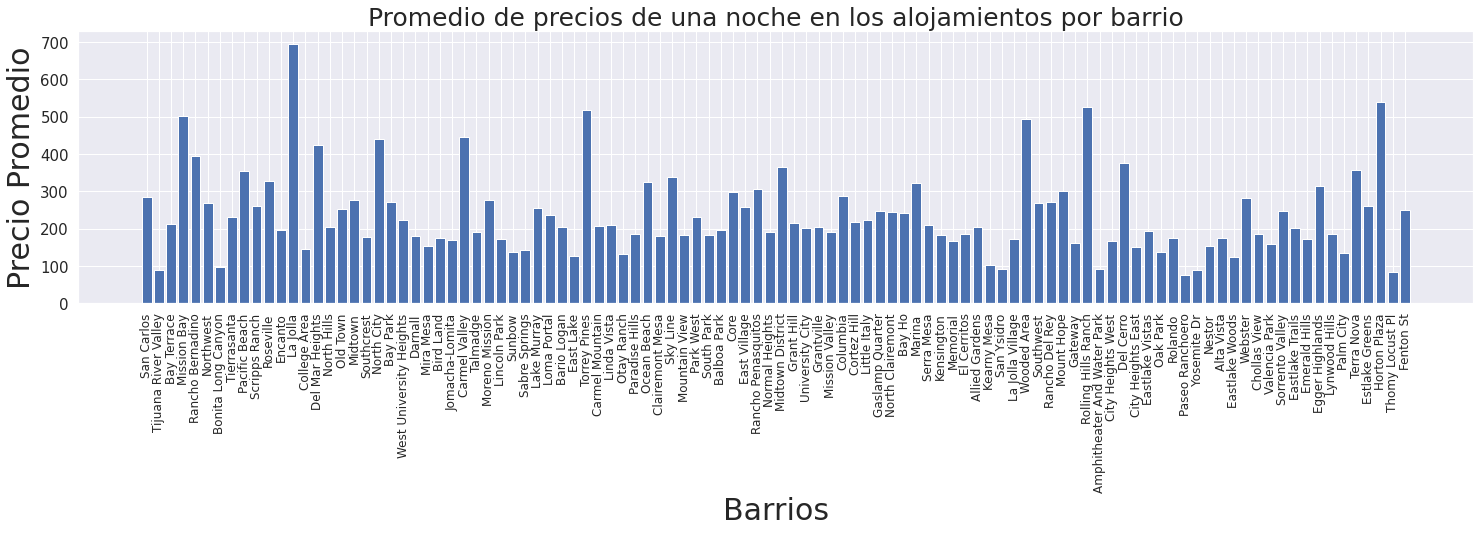

In [5]:
#variables para faciliar la lectura
diccionario_nuevo = principal_pregunta1(lista)
barrios = diccionario_nuevo.keys()
promedios= diccionario_nuevo.values()
titulo = "Promedio de precios de una noche en los alojamientos por barrio"



def dibujar_grafico_barra(titulo, etiqueta_x, etiqueta_y,datos_x,datos_y):
  plt.figure(figsize = (25,5)) #para dar las dimensiones de la figura 
  plt.xticks(rotation = 90,fontsize=12); #rota las etiquetas del eje x y tamaño de la fuente de los valores del eje x
  plt.yticks(fontsize=15); #tamaño de la fuente de los valores del eje y
  plt.xlabel(etiqueta_x,fontsize=30) #indica qué representa el eje x
  plt.ylabel(etiqueta_y,fontsize=30) #indica qué representa el eje y
  plt.title(titulo,fontsize=25) #titulo del gráfico y tamaño de la fuente
  plt.bar(datos_x, datos_y) #pasamos los datos a graficar

dibujar_grafico_barra(titulo,"Barrios", "Precio Promedio",barrios,promedios)

# 2da pregunta

# **Top 5 alojamientos más baratos en un barrio (a elegir)**

# *Barrio elegido: Mission Valley*

In [6]:
import operator
'''
En primer lugar, tomaremos los datos de la funcion principal y
crearemos Un diccionario en el que la clave será el nombre del alojamiento (string) y 
el valor el precio (entero)
'''


def filtrado(lista,nombre):
  '''
  La función sirve para filtrar aquellos elementos de la lista que no cumplan con el nombre del barrio elegido, en caso de cumplir se guardan los valores en la variable 'filtrado'
  '''

  #variable en la que armaremos el diccionario solamente con el nombre y el precio.
  diccionario = {}

  for alojamiento in lista:
    
    if alojamiento['neighbourhood'] == nombre:
      nombre_alojamiento = alojamiento['name'] 
      diccionario[nombre_alojamiento] = alojamiento['price'] 
    
  return diccionario


def ordenar(diccionario):
 
  #pasamos los valores a enteros.
  diccionario = {clave: int(valor) for clave, valor in diccionario.items()}

  #ordenamos el diccionario en orden descendente por los valores
  sortedDictWithValues = dict(sorted(diccionario.items(), key=operator.itemgetter(1)))

  return sortedDictWithValues



def top5(diccionario):
  primeros_5 = []

  for i, (clave, valor) in enumerate(diccionario.items()):
    primeros_5.append((clave, valor))
    if i == 4:
      break

  return primeros_5


In [7]:
def principal_pregunta2(lista):
    '''
    Esta funcion llama a la funcion top5.
    primero cargamos la lista principal con lectura_y_carga,
    luego, a esa misma lista le ejecutamos top5 que dentro de sí invoca a las funciones filtrado y ordenPrecio que filtran los elememtos de dicha lista y luego los ordena de menor a mayor
    '''
    diccionario = filtrado(lista,'Mission Valley')
    ordenador = ordenar(diccionario)
    return top5(ordenador)

print(principal_pregunta2(lista))

[('Private bed &bath/close to downtown & shopping', 60), ('Travel Nurses Wanted! Private Bedroom and Bathroom', 69), ('Master BR in 2 BR/2BTH Condo with FirePlace', 70), ('Private Bedroom - Modern Condo', 75), ('Condo Near Beach, SeaWorld, USD and Trolley', 87)]


# Funciones auxilires para la gráfica

In [21]:
'''
Haremos dos funciones para obtener los datos en una estrucutra mas facilmente para graficar.
A traves de la funcion nombres_alojamientos y precios, obtendremos dos listas.
Una con la lista de los alojamientos y otra con la lista de los precios.
Ambas estaran ordenadas, es decir al primer alojamiento de la lista de alojamientos le correspodner el primer precio de la lista de precios.

'''


def nombres_alojamientos(lista):
  '''
  Esta funcion recibira la lista obtenida de principal_pregunta2 y transformara a los nombres de los barrios en una lista con los mismos
  '''

  #lista donde se almacenaran los nombres de los alojamientos
  lista_nombres = []

  for alojamientos in lista:
    nombre_alojamiento = alojamientos[0]
    lista_nombres.append(nombre_alojamiento)

  return lista_nombres
  


def precios(lista):
  '''
  Esta funcion recibira la lista obtenida de principal_pregunta2 y transformara a los precios de los barrios en una lista con los mismos
  '''

  #lista donde se almacenaran los nombres de los alojamientos
  lista_precios = []

  for alojamientos in lista:
    precio_alojamiento = alojamientos[-1]
    lista_precios.append(precio_alojamiento)

  return lista_precios
  

# **Gráfica**

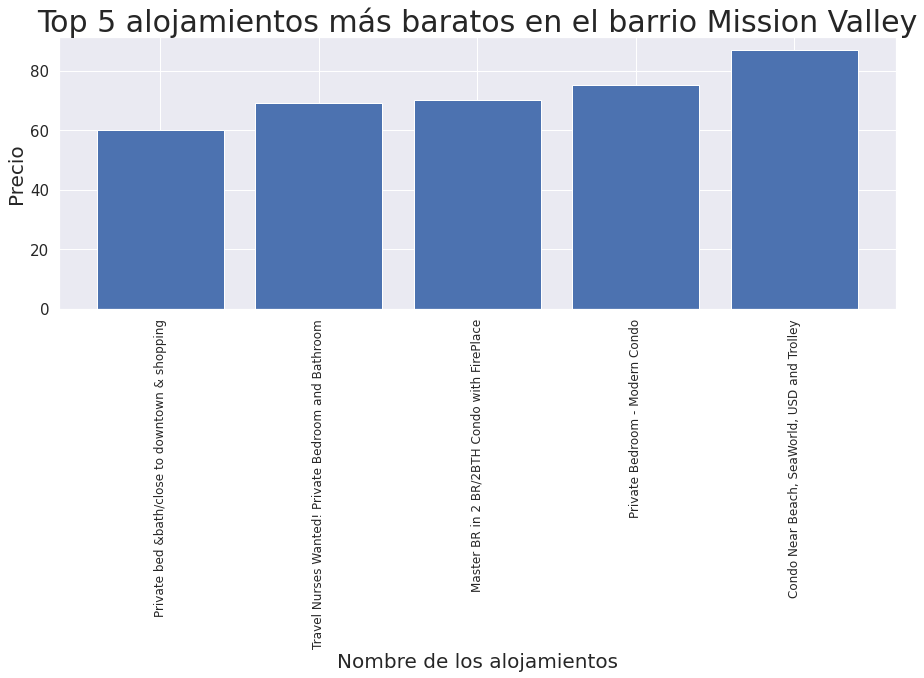

In [33]:
#variables para faciliar la lectura
lista_nueva = principal_pregunta2(lista)
alojamientos = nombres_alojamientos(lista_nueva)
precio = precios(lista_nueva)
titulo = "Top 5 alojamientos más baratos en el barrio Mission Valley"



def dibujar_grafico_barra(titulo, etiqueta_x, etiqueta_y,datos_x,datos_y):
  plt.figure(figsize = (15,5)) #para dar las dimensiones de la figura 
  plt.xticks(rotation = 90,fontsize=12); #rota las etiquetas del eje x y tamaño de la fuente de los valores del eje xe x
  plt.yticks(fontsize=15); #tamaño de la fuente de los valores del eje y
  plt.xlabel(etiqueta_x,fontsize=20) #indica qué representa el eje x
  plt.ylabel(etiqueta_y,fontsize=20) #indica qué representa el eje y
  plt.title(titulo,fontsize=30) #titulo del gráfico y tamaño de la fuente
  plt.bar(datos_x, datos_y) #pasamos los datos a graficar

dibujar_grafico_barra(titulo,"Nombre de los alojamientos", "Precio",alojamientos,precio)


# 3era pregunta

# **Porcentaje de alojamientos que permiten mascotas por barrio**

In [ ]:

'''
En primer lugar, tomaremos los datos de la funcion principal y
crearemos Un diccionario en el que la clave será el nombre del barrio (string) y 
el valor una lista con dos numeros enteros. El primero sera la cantidad de alojamientos que permiten mascotas y el segundo la cantidad que NO.
'''


def permite_animales(nombre):
    '''
    La funcion toma un nombre de alojamiento y devuelve True si permite mascotas y False en caso que no permita.
    '''

    #transformamos todo el nombre en minusculas para no tener problemas
    nombre = nombre.lower()

    return (("dogs welcome" in nombre) or ("pets welcome" in nombre) or ("dogs ok" in nombre) or ("pets ok" in nombre) or ("dog ok" in nombre) or ("pet ok" in nombre) or ("dog-friendly" in nombre) or ("pet-friendly" in nombre))


def barrio_y_cantidad(lista):
    '''
    la funcion toma la lista proveniente de la funcion principal, y en base a ella
    crea un diccionario con la clave indicando el nombre de cada ciudad y
    el valor una lista con dos numeros enteros. 
    Utiliza la funcion permite_animales para verificar si el alojamiento permite o no mascotas.
    El primero sera la cantidad de alojamientos que permiten mascotas y el segundo la cantidad que NO.
    '''
    
  

    #diccionario en el que almacenaremos el barrio con la cantidad de mascotas permitidas o no permitidas.
    diccionario = {}
    

    for persona in lista:
        barrio = persona['neighbourhood']
        nombre = persona['name']

    

        #primero verificaremos si esta o no en el diccionario

        if barrio not in diccionario:

            #verificamos si permite o no mascotas
            if permite_animales(nombre):

                #en caso que permita, agregamos el nombre del barrio al diccionario con el valor[1,0] indicando que el primer alojamiento analizado permite mascotas
                diccionario[barrio] = [1,0]
                
            
            else:
                
                #en caso que no permita, agregamos el nombre del barrio al diccionario con el valor[0,1] indicando que el primer alojamiento analizado no permite mascotas
                diccionario[barrio] = [0,1]
                

        else:

            if permite_animales(nombre):

                #si permite mascotas. sumamos 1 al primer elemento del diccionario que es el que indica cuantos alojamientos permiten mascotas.
                diccionario[barrio][0] += 1
                

            else:

                #si no permite mascotas. sumamos 1 al segundo elemento del diccionario que es el que indica cuantos alojamientos no permiten mascotas.
                diccionario[barrio][1] += 1
                

    return diccionario
    

        
def porcentaje(diccionario):
    '''
    La funcion recibira un diccionario con una clave barrio y un valor que sera una lista con dos enteros.
    La misma, calculara el promedio del primer entero con respecto a la suma del primero con el segundo.
    Devolera un diccionario, con clave barrio y valor que sera el numero del pocentaje
    
    '''

    #inicializamos la variable en la que sumaremos ambas cantidades
    suma=0
    #inicalizamos la variable en la que calcularemos el porcentaje
    porcentaje=0

    for barrio in diccionario:
      aceptados , rechazados = diccionario[barrio]
      suma += aceptados + rechazados

      porcentaje = (aceptados  / suma) * 100
      diccionario[barrio]= porcentaje

        #volvemos a darle valor 0 a las variables para poder hacer un nuevo porcentaje.
      suma = 0
      porcentaje = 0

    return diccionario



In [ ]:
def principal_pregunta3(lista):
    '''
    Esta funcion llama a la funcion barrio_y_cantidad y a la funcion porcentaje Y recibe como argumento una lista donde se encuentran los datos del csv
    En primer lugar, a a la lista pasada como argumento le ejecutamos barrio_y_cantidad que transforma esa lista en un diccionario con el barrio y una lista que indica la cantidad de alojamientos que permiten mascotas
    y por ultimo, la funcion porcentaje toma ese diccionario y calcula el porcentaje de la cantidad de alojamientos que permiten mascotas sobre la cantidad general de alojamientos,
    modificando el diccionario pasado como argumento.
 
    '''
    
    diccionario =  barrio_y_cantidad(lista)
    diccionario_nuevo = porcentaje(diccionario)
    return diccionario_nuevo


    
print(principal_pregunta3(lista))

{'Egger Highlands': 0.0, 'Del Mar Heights': 0.0, 'East Lake': 0.0, 'Tijuana River Valley': 0.0, 'Sky Line': 0.0, 'Paradise Hills': 0.0, 'Bay Terrace': 0.0, 'College Area': 0.6024096385542169, 'Southcrest': 0.0, 'Rolando': 0.0, 'Midtown District': 2.3255813953488373, 'La Jolla': 4.901960784313726, 'Mission Bay': 4.267931238885596, 'North City': 0.0, 'San Ysidro': 0.0, 'Rancho Del Rey': 0.0, 'Tierrasanta': 0.0, 'Encanto': 0.0, 'Ocean Beach': 3.7383177570093453, 'Lake Murray': 0.0, 'Rancho Bernadino': 0.0, 'Northwest': 0.0, 'Bonita Long Canyon': 0.0, 'Lynwood Hills': 0.0, 'Terra Nova': 0.0, 'Sunbow': 0.0, 'Southwest': 0.0, 'Darnall': 0.0, 'Rancho Penasquitos': 1.1904761904761905, 'Jomacha-Lomita': 0.0, 'San Carlos': 0.0, 'Pacific Beach': 2.277904328018223, 'Roseville': 1.1627906976744187, 'North Hills': 0.0, 'Old Town': 0.7843137254901961, 'Midtown': 0.21097046413502107, 'Bay Park': 0.6024096385542169, 'West University Heights': 0.0, 'Mira Mesa': 0.0, 'Bird Land': 0.0, 'Carmel Valley': 0.

# **Gráfica** (graficaremos solo los barrios que tienen porcentaje > 0

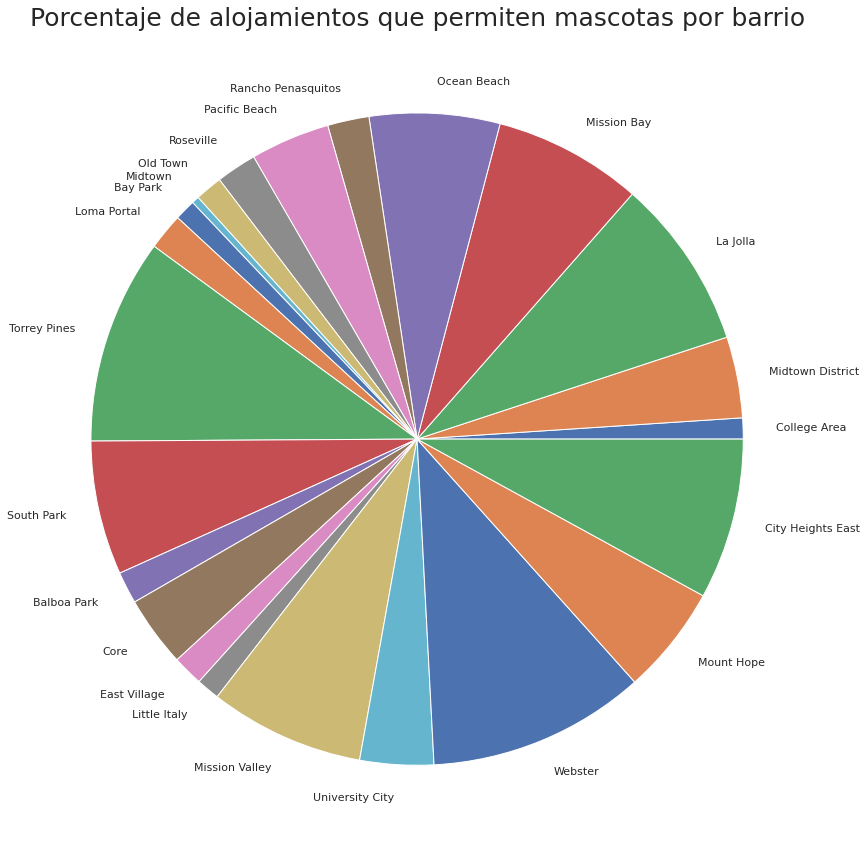

In [ ]:
'''
haremos una funcion para filtrar aquellos barrios que su porcentaje sea mayor a 0
'''

def filtrar_barrios(diccionario):
  '''
  La funcion recibe un diccionario y filtra en otro diccionario alojamientos que el porcentje sea > 0.
  '''

  #variable donde almacenaremos los barrios filtrados
  diccionario_filtrados = {}

  for alojamiento in diccionario:
    if diccionario[alojamiento] > 0:
      diccionario_filtrados[alojamiento] = diccionario[alojamiento]

  return diccionario_filtrados


#variables para faciliar la lectura
diccionario_nuevo = principal_pregunta3(lista)
diccionario_filtrado = filtrar_barrios(diccionario_nuevo)

barrios = diccionario_filtrado.keys()
porcentaje= diccionario_filtrado.values()
titulo = "Porcentaje de alojamientos que permiten mascotas por barrio"


def dibujar_grafico_torta(titulo, etiquetas,porcentajes):
  plt.figure(figsize = (40,15))
  plt.title(titulo,fontsize=25) #titulo del gráfico y tamaño de la fuente
  plt.pie(porcentajes, labels  = etiquetas)

dibujar_grafico_torta(titulo,barrios,porcentaje)